In [1]:
from google.colab import files
uploaded=files.upload()

Saving Incinerator.xlsx to Incinerator.xlsx


### Introduction
In order to locate a new garbage dump site near our city, we must look for the optimal location to minimize its impact on house prices in the area. This report estimates the impact of a dump site’s vicinity on house prices. We are going to take the available historical data about house prices in our city for two available years, which are 1978 and 1981, and present an econometric model. Determinants measured are distance to dump site, property area, the land associated with a property, number of rooms, number of baths, age of the house, distance to the city center, and distance to the ring road. On the base of this analysis, a model for predicting the prices of a house is constructed.
We will be using following machine learning models for our data analysis:
* Univariate linear regression
* Difference in Difference model
* Multivariate linear regression


### Problem statement


1.   To find out the factors affecting the house price.
2.   To find out how much impact does having homes near/far from incenerator bring on the house prices.



In [296]:
#data frame
import pandas as pd
#for mathematical operations
import numpy as np
#for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Description of dataset.

 1. year          --           1978 or 1981
 2. age            --          age of house
 3. agesq            --        age^2
 4. nbh             --         neighborhood #, 1 to 6
 5. cbd             --         dist. to central bus. dstrct, feet
 6. intst           --         dist. to interstate, feet
 7. lintst          --         log(intst)
 8. price           --         selling price
 9. rooms           --         # rooms in house
 10. area           --          square footage of house
 11. land           --          square footage lot
 12. baths          --          # bathrooms
 13. dist           --          dist. from house to incinerator, feet
 14. ldist          --          log(dist)
 15. wind           --          perc. time wind incin. to house
 16. lprice         --          log(price)
 17. y81            --          1 if year == 1981
 18. larea          --          log(area)
 19. lland          --          log(land)
 20. y81ldist       --          y81*ldist
 21. lintstsq       --          lintst^2
 22. nearinc        --          1 if dist <= 15840
 23. y81nrinc       --          y81*nearinc
 24. rprice         --          price in 1978 (dollars)
 25. lrprice        --          log(rprice)

In [297]:
df=pd.read_excel('Incinerator.xlsx')
df.head()

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,land,baths,dist,ldist,wind,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
0,1978,48,2304,4,3000,1000,6.9078,60000,7,1660,4578,1,10700,9.277999,3,11.00210,0,7.414573,8.429017,0.0,47.71770,1,0,60000.0,11.00210
1,1978,83,6889,4,4000,1000,6.9078,40000,6,2612,8370,2,11000,9.305651,3,10.59663,0,7.867871,9.032409,0.0,47.71770,1,0,40000.0,10.59663
2,1978,58,3364,4,4000,1000,6.9078,34000,6,1144,5000,1,11500,9.350102,3,10.43412,0,7.042286,8.517193,0.0,47.71770,1,0,34000.0,10.43412
3,1978,11,121,4,4000,1000,6.9078,63900,5,1136,10000,1,11900,9.384294,3,11.06507,0,7.035269,9.210340,0.0,47.71770,1,0,63900.0,11.06507
4,1978,48,2304,4,4000,2000,7.6009,44000,5,1868,10000,1,12100,9.400961,3,10.69195,0,7.532624,9.210340,0.0,57.77368,1,0,44000.0,10.69195


In [298]:
len(df.price.unique())

200

In [299]:
df.shape

(321, 25)

Text(0.5, 1.0, 'Visualization of null values (if any)')

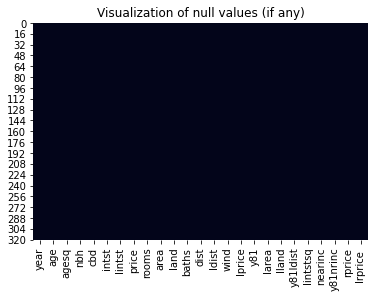

In [300]:
sns.heatmap(df.isnull(),cbar=False)
plt.title('Visualization of null values (if any)')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f16a73a94a8>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

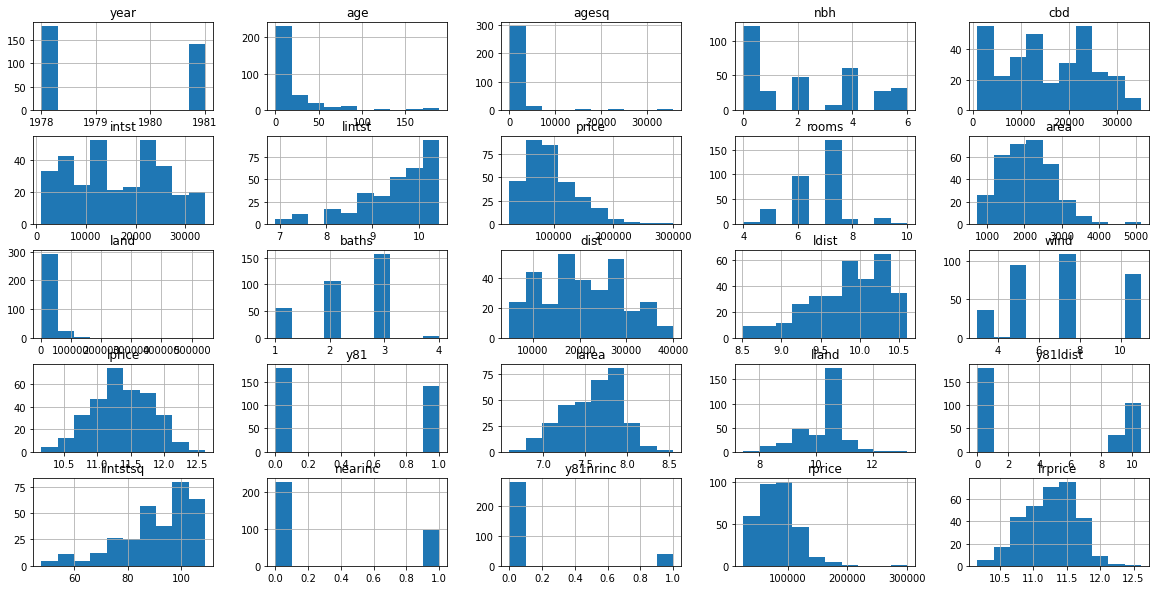

In [301]:
plt.figure(facecolor='grey')
df.hist(figsize=(20,10))
# This is is a representation of the distribution of data  on each series in 
#the DataFrame, resulting in one histogram per column

In [302]:
df.describe()

,year,age,agesq,nbh,cbd,intst,lintst,price,rooms,area,land,baths,dist,ldist,wind,lprice,y81,larea,lland,y81ldist,lintstsq,nearinc,y81nrinc,rprice,lrprice
count,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000,321.000000
mean,1979.327103,18.009346,1381.566978,2.208723,15822.429907,16442.367601,9.480513,96100.660436,6.585670,2106.728972,39629.890966,2.339564,20715.576324,9.837414,6.978193,11.378118,0.442368,7.597232,10.301858,4.342579,90.482246,0.299065,0.124611,83721.355483,11.261377
std,1.492329,32.565845,4801.788757,2.164353,8967.106296,9033.130652,0.777165,43223.728867,0.901204,694.957902,39514.390241,0.770526,8508.183950,0.478383,2.665079,0.438174,0.497443,0.340723,0.801751,4.892513,14.066470,0.458563,0.330792,33118.785771,0.387900
min,1978.000000,0.000000,0.000000,0.000000,1000.000000,1000.000000,6.907800,26000.000000,4.000000,735.000000,1710.000000,1.000000,5000.000000,8.517193,3.000000,10.165850,0.000000,6.599871,7.444249,0.000000,47.717700,0.000000,0.000000,26000.000000,10.165850
25%,1978.000000,0.000000,0.000000,0.000000,9000.000000,9000.000000,9.105000,65000.000000,6.000000,1560.000000,16935.000000,2.000000,13400.000000,9.503010,5.000000,11.082140,0.000000,7.352441,9.737138,0.000000,82.901020,0.000000,0.000000,59000.000000,10.985290
50%,1978.000000,4.000000,16.000000,2.000000,14000.000000,16000.000000,9.680300,85900.000000,7.000000,2056.000000,43560.000000,2.000000,19900.000000,9.898475,7.000000,11.360940,0.000000,7.628518,10.681890,0.000000,93.708210,0.000000,0.000000,82000.000000,11.314470
75%,1981.000000,22.000000,484.000000,4.000000,23000.000000,24000.000000,10.086000,120000.000000,7.000000,2544.000000,46100.000000,3.000000,27200.000000,10.210970,11.000000,11.695250,1.000000,7.841493,10.738570,9.820106,101.727400,1.000000,0.000000,100230.400000,11.515230
max,1981.000000,189.000000,35721.000000,6.000000,35000.000000,34000.000000,10.434000,300000.000000,10.000000,5136.000000,544500.000000,4.000000,40000.000000,10.596630,11.000000,12.611540,1.000000,8.544030,13.207620,10.568750,108.868400,1.000000,1.000000,300000.000000,12.611540


## Visualizations

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



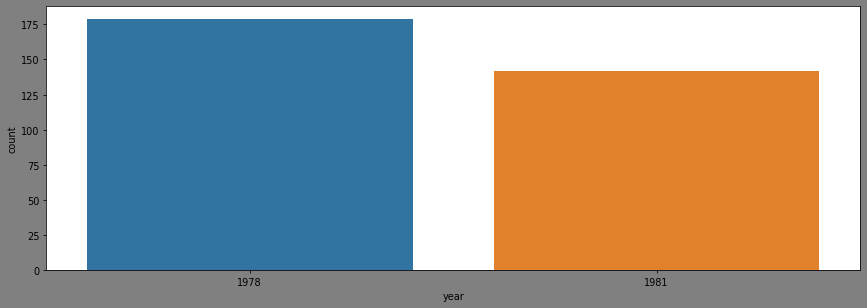

In [303]:
plt.figure(figsize=(15,5),facecolor='grey',dpi=70)
sns.countplot(df.year)

In [304]:
px.scatter(df,x='land',y='area',size='price',size_max=40,color='age',animation_frame='year',animation_group='price',title='Affect of Land area & House area on house prices of each ages given in year 1978 & 1981')

In [305]:
px.scatter_3d(df,x=np.log(df['cbd']),y='ldist',z='lprice',color='year',size='age',size_max=40
,labels={'x':'Distance to bus centre(log)','ldist':'Distance from incenerator(log)'}
,title='3-D scatter plot showing effect of Incenerator distance & Bus centre distance in the house price for both years in data')

In [306]:
px.density_heatmap(df,x=np.log(df['cbd']),y='ldist',z='lprice',animation_frame='year',animation_group='lprice'
,title='Effect of Incenerator distance & Bus centre distance in the house price for both years in data')

Text(0.5, 0, 'Rooms')

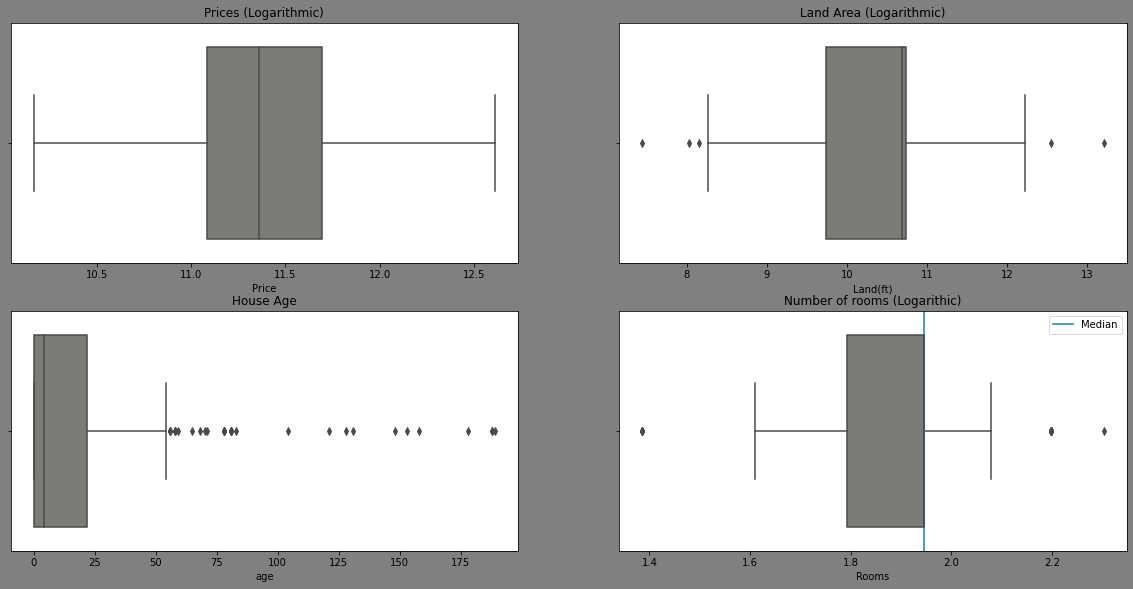

In [307]:
plt.figure(facecolor='grey',figsize=(20,15))
plt.subplot(3,2,1)
sns.boxplot(data=df,x='lprice',orient='h',palette='cividis_r')
plt.title('Prices (Logarithmic)')
plt.xlabel('Price')
plt.subplot(3,2,2)
sns.boxplot(data=df,x='lland',palette='cividis_r')
plt.title('Land Area (Logarithmic)')
plt.xlabel('Land(ft)')
plt.subplot(3,2,3)
sns.boxplot(data=df,x='age',palette='cividis_r')
plt.title('House Age')
plt.subplot(3,2,4)
sns.boxplot(data=df,x=np.log(df['rooms']),palette='cividis_r')
plt.title('Number of rooms (Logarithic)')
plt.axvline(np.median(np.log(df.rooms)),label='Median')
plt.legend()
plt.xlabel('Rooms')

Text(0.5, 1.0, 'Distance from interstate (Logarithmic)')

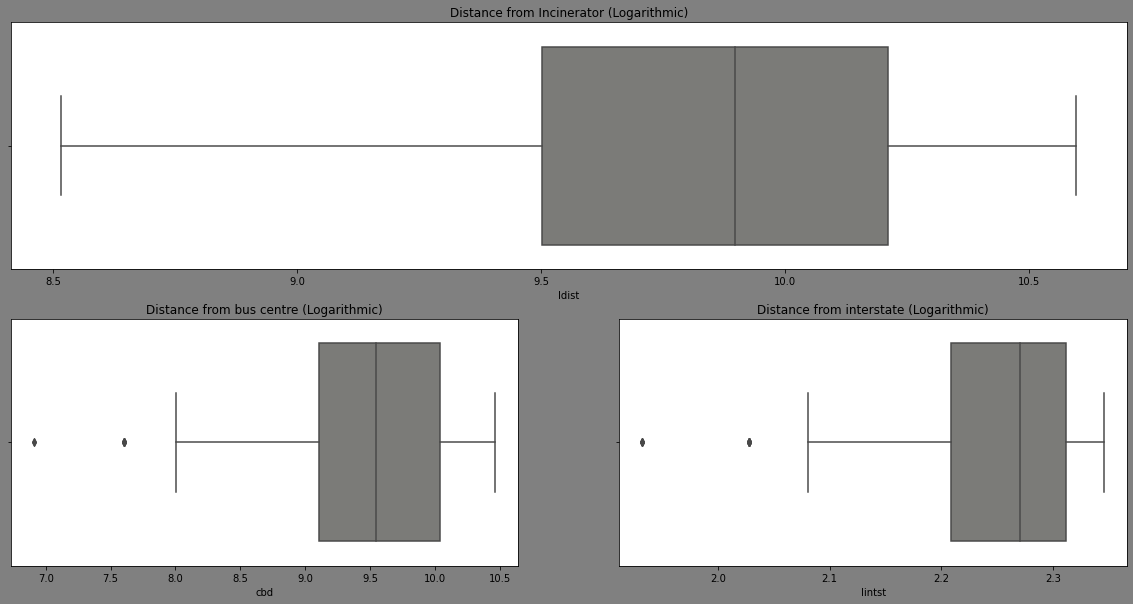

In [308]:
plt.figure(facecolor='grey',figsize=(20,10))
plt.subplot(211)
sns.boxplot(data=df,x='ldist',orient='h',palette='cividis_r')
plt.title('Distance from Incinerator (Logarithmic)')
plt.subplot(223)
sns.boxplot(data=df,x=np.log(df['cbd']),palette='cividis_r')
plt.title('Distance from bus centre (Logarithmic)')
plt.subplot(224)
sns.boxplot(data=df,x=np.log(df['lintst']),palette='cividis_r')
plt.title('Distance from interstate (Logarithmic)')

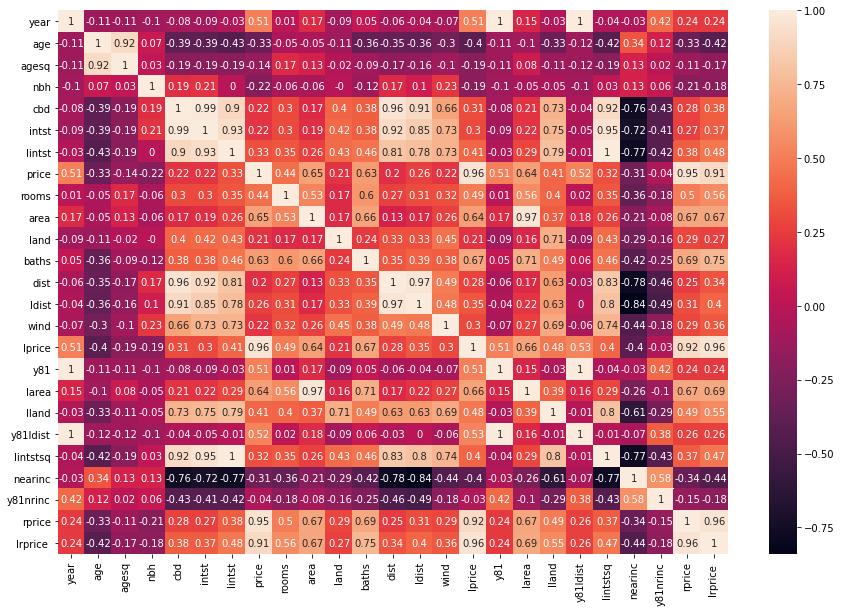

In [309]:
plt.figure(figsize=(15,10))
#This shows how much related is one parameter to the other in the dataset. 
sns.heatmap(np.round(df.corr(),2),annot=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Incenerator distance vs Bus centre distance')

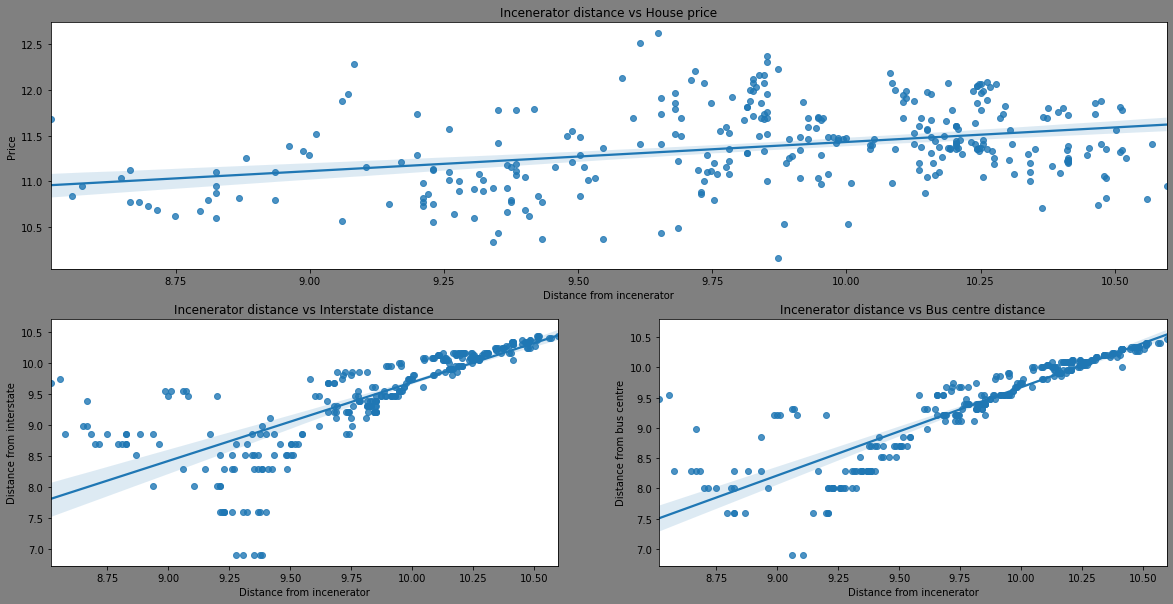

In [310]:
plt.figure(figsize=(20,10),facecolor='grey')
plt.subplot(211)
sns.regplot(df.ldist,df.lprice)
plt.xlabel('Distance from incenerator')
plt.ylabel('Price')
plt.title('Incenerator distance vs House price')
plt.subplot(223)
sns.regplot(df.ldist,df.lintst)
plt.xlabel('Distance from incenerator')
plt.ylabel('Distance from interstate')
plt.title('Incenerator distance vs Interstate distance')
plt.subplot(224)
sns.regplot(df.ldist,np.log(df.cbd))
plt.xlabel('Distance from incenerator')
plt.ylabel('Distance from bus centre')
plt.title('Incenerator distance vs Bus centre distance')

### Assumption 1

In [311]:
inter=np.corrcoef(df.ldist,df.lintst)[1][0]
cbd=np.corrcoef(df.ldist,np.log(df.cbd))[1][0]
price=np.corrcoef(df.ldist,df.lprice)[1][0]
print('House price depends on incenerator distance by',np.round(price*100,0),'%')
print('Incenerator distance depends on interstate distance by',np.round(inter*100,0),'%')
print('Incenerator distance depends on bus centre distance by',np.round(cbd*100,0),'%')

House price depends on incenerator distance by 35.0 %
Incenerator distance depends on interstate distance by 78.0 %
Incenerator distance depends on bus centre distance by 89.0 %


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



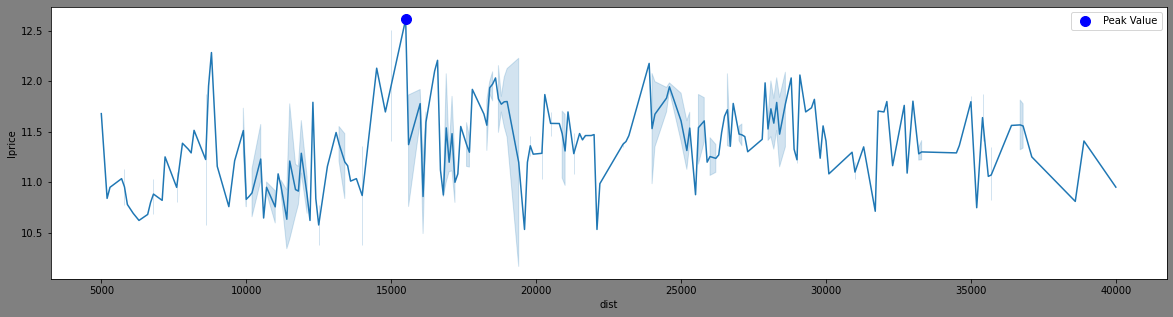

In [312]:
plt.figure(figsize=(20,5),facecolor='grey')
ax=sns.lineplot(df.dist,df.lprice)
x = ax.lines[0].get_xdata() # Get the x data of the distribution
y = ax.lines[0].get_ydata() # Get the y data of the distribution
maxid = np.argmax(y) # The id of the peak (maximum of y data)
plt.plot(x[maxid],y[maxid], 'bo', ms=10,label='Peak Value')
plt.legend()

In [313]:
print('The incenerator distance at which the house price is found to be maximum is',np.round(x[maxid],1),'ft.')

The incenerator distance at which the house price is found to be maximum is 15500 ft.


Houses situated within the distance of 15600ft from incenerator are considered as "Near to the incenerator" and rest are consider as farther.

In [314]:
near_lim=df.query('nearinc==1')['dist'].max()
drop=np.corrcoef(df.nearinc,df.price)[0][1]
print('Limit for least distance:',near_lim)
print('Coefficient of price drop:',np.round(drop,2))

Limit for least distance: 15600
Coefficient of price drop: -0.31


### Model 1

Here we will be considering the fact that being near or farther to the incenerator will impact on the house prices. Hence in this model we will find out how much will be impact of only 'nearinc' on the house price.

In [315]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [316]:
Y=df.nearinc.values
Y=Y.reshape(-1,1)
X=df.lprice.values
X=X.reshape(-1,1)
x_train,x_test,y_train,y_test=tts(X,Y,train_size=0.8, random_state=0)

In [317]:
lin=LinearRegression()
lin.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [318]:
metrics.r2_score(y_test,lin.predict(x_test))

0.09451150602147806

In [319]:
lin.coef_

array([[-0.44045873]])

### Assumption 2
From the given coefficient of the above linear model, it is clear that if the house is near the dumpsite (i.e within 15600ft) then price drop will be around 4.4% for every 1ft of closeness.

### Model 2
Since in the above model we considered the condition of being near/far as an impact on house prices. Here we will find out if the house prices vary according to the year in the data (i.e 1978 & 1981) and also the condition of being near/far in those each years.
Here we used "Difference-in-Difference model" for doing this analysis.

In [320]:
import statsmodels.formula.api as smf

In [321]:
model='lprice ~ nearinc + y81 + y81nrinc'
mod=smf.ols(formula=model,data=df)
did=mod.fit()
print(did.summary())

                            OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.409
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     73.15
Date:                Fri, 27 Nov 2020   Prob (F-statistic):           5.61e-36
Time:                        11:23:14   Log-Likelihood:                -105.68
No. Observations:                 321   AIC:                             219.4
Df Residuals:                     317   BIC:                             234.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.2854      0.031    369.839      0.0

In [322]:
np.round(did.rsquared-metrics.r2_score(y_test,lin.predict(x_test)),3)

0.315

### Assumption 3
Difference between R square values in both models till now is 0.315 which is huge. 
This means that 'y81nrinc' column is significant as the effect of both years in the data also contribute to the change in house price.

### Model 3
Here we will use all the parameters in the dataset that may bring an impact on the house prices and will determine how much they impact the house price by the help of "Multi-Variate Linear Regression".

In [324]:
#Obtaining a new dataset that contains the dependant and independant variables
df2=df.drop(['cbd', 'intst', 'lintst','dist', 'ldist', 'wind','rprice', 'lrprice ','lintstsq'],axis='columns')
df2.head()

,year,age,agesq,nbh,price,rooms,area,land,baths,lprice,y81,larea,lland,y81ldist,nearinc,y81nrinc
0,1978,48,2304,4,60000,7,1660,4578,1,11.00210,0,7.414573,8.429017,0.0,1,0
1,1978,83,6889,4,40000,6,2612,8370,2,10.59663,0,7.867871,9.032409,0.0,1,0
2,1978,58,3364,4,34000,6,1144,5000,1,10.43412,0,7.042286,8.517193,0.0,1,0
3,1978,11,121,4,63900,5,1136,10000,1,11.06507,0,7.035269,9.210340,0.0,1,0
4,1978,48,2304,4,44000,5,1868,10000,1,10.69195,0,7.532624,9.210340,0.0,1,0


Since we won't be using the number of neighbours in our model, but we can break it into two categories (0 neighbours & neighbours more than 0) with the help of "One-hot encoding" for a simplification in our regression analysis. So we will create a column "nbh_0" in "df2" for this operation.

In [325]:
df2['nbh_0']=np.where(df['nbh'],0,1) #more than one neighbours represents 0.

In [326]:
df2.head()

,year,age,agesq,nbh,price,rooms,area,land,baths,lprice,y81,larea,lland,y81ldist,nearinc,y81nrinc,nbh_0
0,1978,48,2304,4,60000,7,1660,4578,1,11.00210,0,7.414573,8.429017,0.0,1,0,0
1,1978,83,6889,4,40000,6,2612,8370,2,10.59663,0,7.867871,9.032409,0.0,1,0,0
2,1978,58,3364,4,34000,6,1144,5000,1,10.43412,0,7.042286,8.517193,0.0,1,0,0
3,1978,11,121,4,63900,5,1136,10000,1,11.06507,0,7.035269,9.210340,0.0,1,0,0
4,1978,48,2304,4,44000,5,1868,10000,1,10.69195,0,7.532624,9.210340,0.0,1,0,0


In [327]:
feat=['age', 'agesq','age', 'agesq','baths', 'y81', 'larea', 'lland','nearinc', 'nbh_0']
X2=df2[feat]
Y2=df2[['lprice']]

In [328]:
x_train2,x_test2,y_train2,y_test2=tts(X2,Y2,train_size=0.8)

In [329]:
lin.fit(x_train2,y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [330]:
metrics.r2_score(y_test2,lin.predict(x_test2))

0.7248873935825679

In [331]:
lin.coef_

array([[-3.44803514e-03,  1.58675322e-05, -3.44803514e-03,
         1.58675322e-05,  1.21352126e-01,  3.86775258e-01,
         4.13145027e-01,  6.18639939e-02, -2.10132171e-02,
         4.01205130e-02]])

Lets obtain a dictionary that contains the names of coefficients in this model as keys with their corresponding values.

In [332]:
features=[]
for x in feat:
  features.append(x)
coeff=[]
for y in lin.coef_[0]:
    coeff.append(y)

res = {} 
for key in features: 
    for value in coeff: 
        res[key] = value 
        coeff.remove(value) 
        break  

In [333]:
res

{'age': -0.0034480351370952287,
 'agesq': 1.586753219654322e-05,
 'baths': 0.12135212615004931,
 'larea': 0.41314502727614966,
 'lland': 0.06186399391310504,
 'nbh_0': 0.04012051301892332,
 'nearinc': -0.021013217063756733,
 'y81': 0.38677525775958455}


### Results

*   If year is 1981 then there will be a price increase by 39%,assuming all other variables are held constant.
*   For each year increase in house age, there will be 0.3% of decrease in house price,assuming all other variables are held constant.


*   For every bathroom, there will be a price increase of 13%,assuming all other variables are held constant.
*   For increase of area by 1% there will be a price increase by 37%,assuming all other variables are held constant.


*  For increase of land by 1% there will be a price increase by 9%,assuming all other variables are held constant. 
*   Increasing neaighbours also result in increase of price by 5.3%,For increase of area by 1% there will be a price increase by 37%,assuming all other variables are held constant.


*   For every ft of increase in distance from incenerator, the price will be increased by 2.5%,assuming all other variables are held constant.
* For increase of area by 1% there will be a price increase by 37%,assuming all other variables are held constant.









In [334]:
px.bar(x=features,y=lin.coef_[0],title='Comparision of dependancy of House Prices on the following parameters',range_y=[-0.04,0.4]
       ,labels={'x':'Parameters effecting house price','y':'Impact on house price'})

## Conclusion  - 
Houses analysed in the shift from 1978 to 1981 had the most impact on price variance whose significance was hard to explain. Although there are number of bathrooms, area of house & area of land that impact the price of the house. But, the house distance from the incenerator did'nt bring much impact on the house prices when compared with other parameters.